Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
#Template https://www.tensorflow.org/tutorials/load_data/images


In [89]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [226]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
!ls

Narayana_Isanaka (2).ipynb   Narayana_Isanaka_local.ipynb
Narayana_Isanaka_Final.ipynb


# 1. Data Reading/Data Understanding

In [227]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('Total images for training:',image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('Total images for test:',image_count_test)

Total images for training: 2239
Total images for test: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:
- Created train & validation dataset from the train directory with a batch size of 32 .
- Resized images to 180*180.(10%)

In [220]:
batch_size = 32
img_height = 180
img_width = 180

- Use 80% of the images for training, and 20% for validation.

In [221]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10328 files belonging to 9 classes.
Using 8263 files for training.


In [222]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10328 files belonging to 9 classes.
Using 2065 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:

count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))

## checking the count of images for each category of cancer
Class imbalance occurs when the number of instances in one class significantly differs from those in another class within your dataset. This can affect the performance of machine learning models, especially for classification tasks.

- Image Augmentation (for image data):
- Techniques like rotation, scaling, translation, flipping, and color space augmentation to generate new samples.
### Which class has the least number of samples?
- seborrheic keratosis
### Which classes dominate the data in terms of the proportionate number of samples?
- pigmented benign keratosis

### for Training data

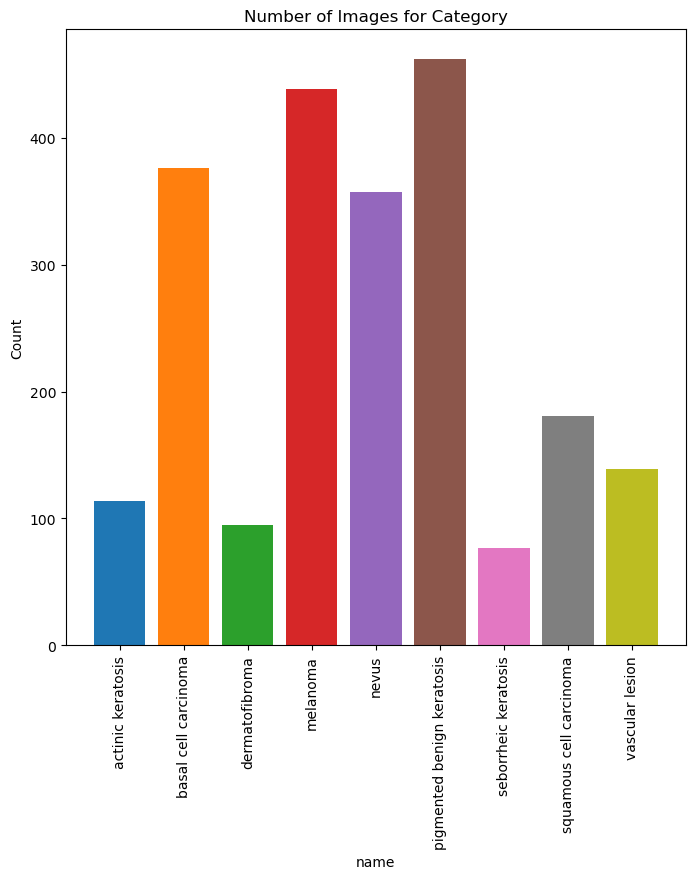

In [11]:
plt.figure(figsize=(8, 8)) 
counts = {}
for name in class_names:
    count=(len(list(data_dir_train.glob(name+'/*.jpg'))))
    counts[name] = count
        # Plotting the counts
    plt.bar(name, counts[name], label=name)
# Adding labels and title
plt.xlabel('name')
plt.ylabel('Count')
plt.title('Number of Images for Category')
plt.xticks(rotation=90)
plt.show()

### For Test Data

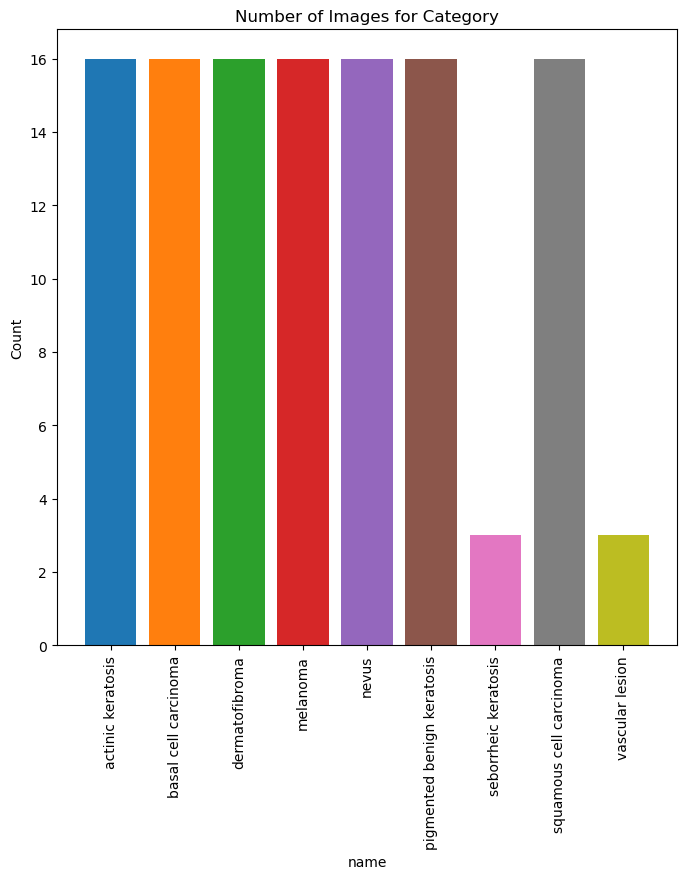

In [12]:
plt.figure(figsize=(8, 8)) 
counts = {}
for name in class_names:
    count=(len(list(data_dir_test.glob(name+'/*.jpg'))))
    counts[name] = count
        # Plotting the counts
    plt.bar(name, counts[name], label=name)
# Adding labels and title
plt.xlabel('name')
plt.ylabel('Count')
plt.title('Number of Images for Category')
plt.xticks(rotation=90)
plt.show()

In [13]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [14]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


2024-08-08 03:43:22.354693: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


32
32


2024-08-08 03:43:22.474768: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


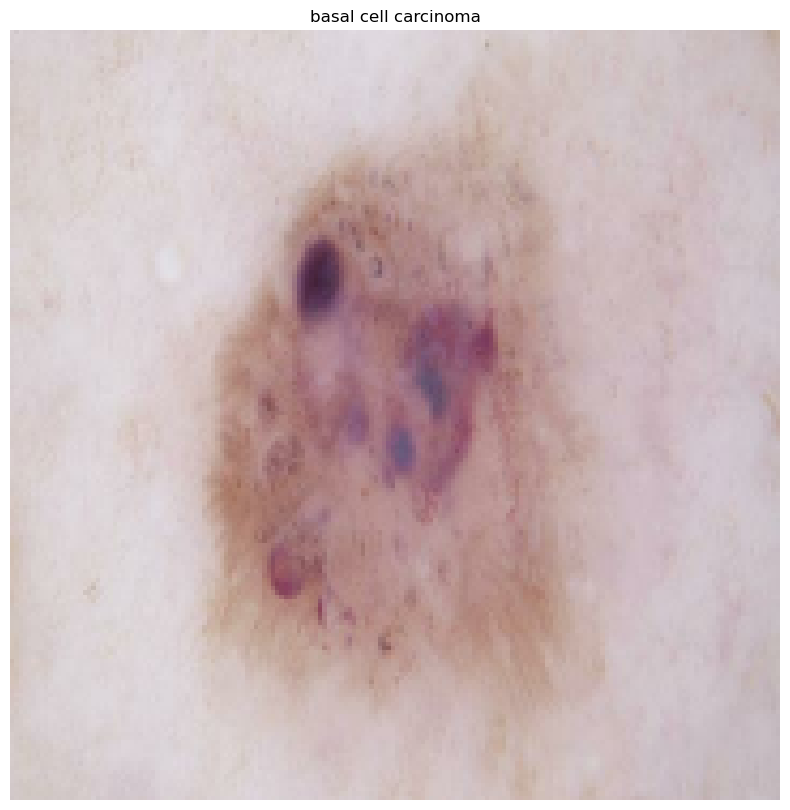

In [15]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title(class_names[labels[0]])
  plt.axis("off")


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

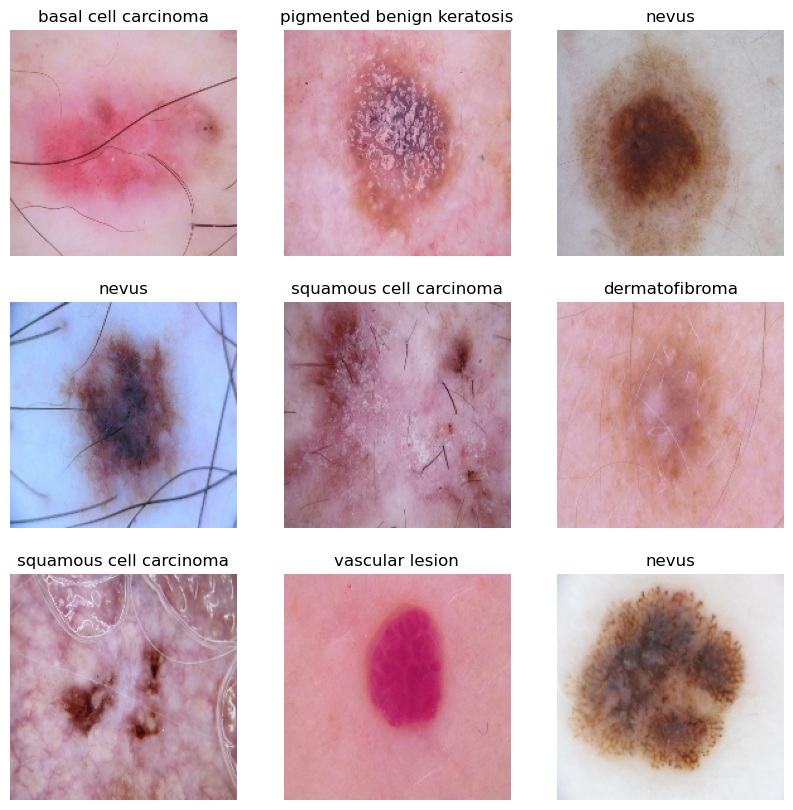

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

In [17]:
print(type(train_ds))
print(len(train_ds))


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
259


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 4.Model Building & training
### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



### Compile the model
Choose an appropirate optimiser and loss function for model training

In [20]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
 layers.Rescaling(2./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(8, 5, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(16, 5, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 5, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(num_classes)
])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       991,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,008,537 (3.85 MB)

 Trainable params: 1,008,537 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

## Optimizer='Adam'
- Train: 56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9295 - loss: 0.2000
- Val:   14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5924 - loss: 2.3523

In [22]:
### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 67s 229ms/step - accuracy: 0.2369 - loss: 2.0062 - val_accuracy: 0.3981 - val_loss: 1.5660
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 55s 211ms/step - accuracy: 0.4029 - loss: 1.5725 - val_accuracy: 0.4431 - val_loss: 1.4636
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 209ms/step - accuracy: 0.4524 - loss: 1.4600 - val_accuracy: 0.5298 - val_loss: 1.3212
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 210ms/step - accuracy: 0.5565 - loss: 1.2180 - val_accuracy: 0.6010 - val_loss: 1.1034
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 209ms/step - accuracy: 0.6581 - loss: 0.9634 - val_accuracy: 0.6189 - val_loss: 1.0789
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 210ms/step - accuracy: 0.7075 - loss: 0.8266 - val_accuracy: 0.6228 - val_loss: 1.0730
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 209ms/step - accuracy: 0.7735 - loss: 0.6262 - val_accuracy: 0.7293 - val_loss: 0.7877
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.8414 - loss: 0

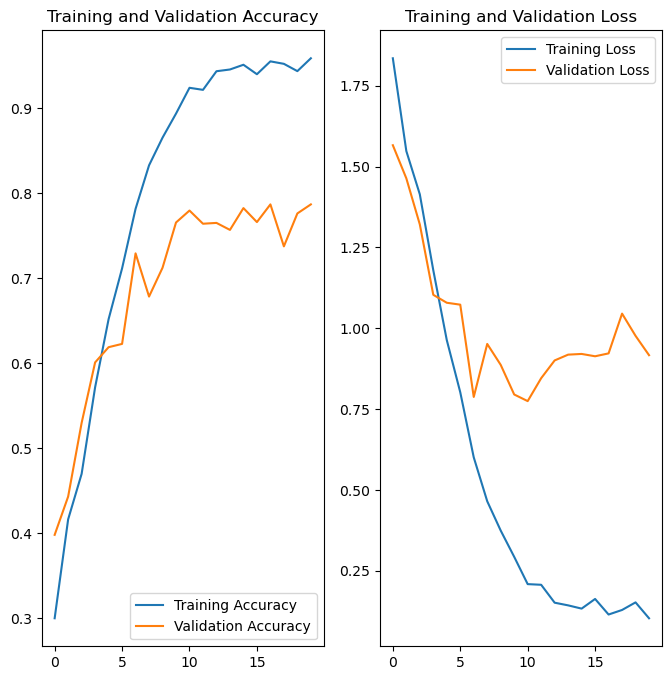

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9706 - loss: 0.0715
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.7791 - loss: 0.9163


[0.9167729616165161, 0.7869249582290649]

# drop usage to try reducing overfit

In [ ]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
 layers.Rescaling(2./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(8, 5, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(16, 5, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 5, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(num_classes)
])

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(train_ds)
model.evaluate(val_ds)

## Optimizer='Adam'
- Train: 56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9295 - loss: 0.2000
- Val:   14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5924 - loss: 2.3523
### VS - (learning_rate=0.001)
- Train: 56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9228 - loss: 0.1596
- Val:   14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5169 - loss: 3.3008
### VS - (learning_rate=0.00001)

- Train: 56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9507 - loss: 0.0773
- Val:   14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5349 - loss: 3.6333

In [26]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 54s 207ms/step - accuracy: 0.1681 - loss: 2.1648 - val_accuracy: 0.2823 - val_loss: 2.1124
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 162s 625ms/step - accuracy: 0.2585 - loss: 2.0858 - val_accuracy: 0.2881 - val_loss: 1.9852
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 195s 754ms/step - accuracy: 0.2898 - loss: 1.9542 - val_accuracy: 0.3075 - val_loss: 1.8494
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 137s 530ms/step - accuracy: 0.3056 - loss: 1.8361 - val_accuracy: 0.3680 - val_loss: 1.7572
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 140s 541ms/step - accuracy: 0.3587 - loss: 1.7548 - val_accuracy: 0.3743 - val_loss: 1.6836
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 122s 472ms/step - accuracy: 0.3866 - loss: 1.6950 - val_accuracy: 0.4218 - val_loss: 1.6255
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 105s 407ms/step - accuracy: 0.3979 - loss: 1.6385 - val_accuracy: 0.4349 - val_loss: 1.5981
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 134s 516ms/step - accuracy: 0.4210 - 

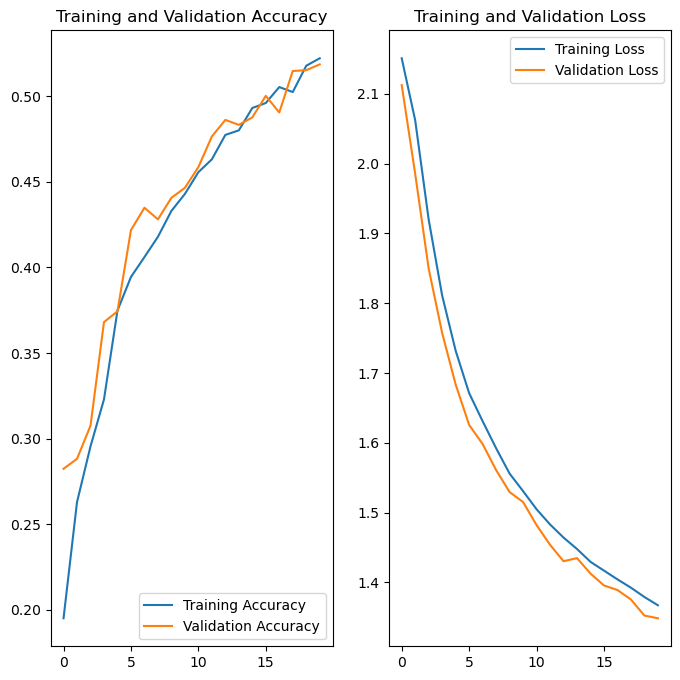

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 31s 121ms/step - accuracy: 0.5220 - loss: 1.3513
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.5049 - loss: 1.3663


[1.3484951257705688, 0.5186440944671631]

## Optimizer='SGD'
- Train: 56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5041 - loss: 1.4536
- Val:   14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5210 - loss: 1.4159

- 56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4123 - loss: 1.6574
- 14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2767 - loss: 1.9655

In [31]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:


### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 113s 433ms/step - accuracy: 0.1656 - loss: 2.1574 - val_accuracy: 0.2334 - val_loss: 2.0143
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 121s 467ms/step - accuracy: 0.2502 - loss: 2.0105 - val_accuracy: 0.3458 - val_loss: 1.8193
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 121s 466ms/step - accuracy: 0.2990 - loss: 1.8795 - val_accuracy: 0.4019 - val_loss: 1.6617
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 120s 463ms/step - accuracy: 0.3665 - loss: 1.7247 - val_accuracy: 0.4484 - val_loss: 1.4866
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 124s 477ms/step - accuracy: 0.4109 - loss: 1.5874 - val_accuracy: 0.4387 - val_loss: 1.5691
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 123s 475ms/step - accuracy: 0.4785 - loss: 1.4265 - val_accuracy: 0.5051 - val_loss: 1.3772
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 118s 455ms/step - accuracy: 0.5007 - loss: 1.3623 - val_accuracy: 0.5308 - val_loss: 1.3030
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 121s 469ms/step - accuracy: 0.5294 -

### Train the model

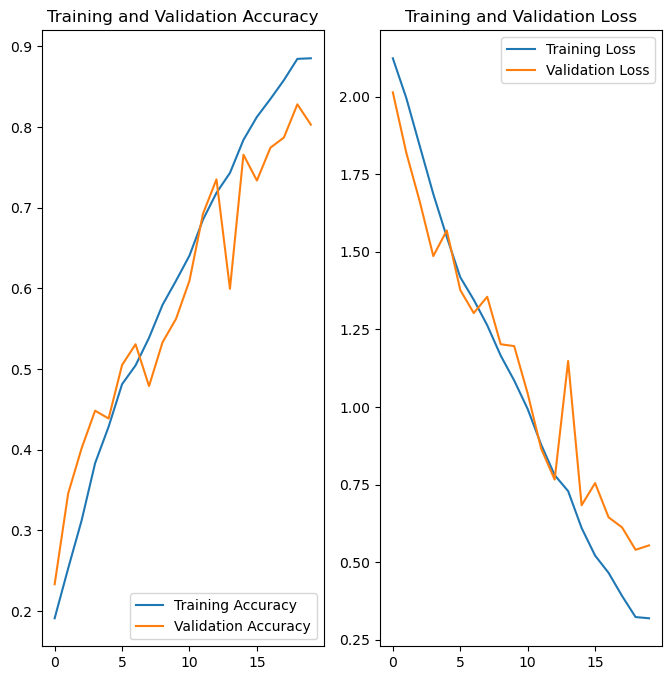

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.9145 - loss: 0.2277
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8065 - loss: 0.5261


[0.5542070269584656, 0.8029055595397949]

## Optimizer='SGD(learning_rate=0.00001)'
- Train:56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5450 - loss: 1.3913
- Val:14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5435 - loss: 1.3703

In [36]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [37]:
### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 133s 512ms/step - accuracy: 0.1113 - loss: 2.2134 - val_accuracy: 0.1530 - val_loss: 2.1954
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 125s 484ms/step - accuracy: 0.1458 - loss: 2.1955 - val_accuracy: 0.1569 - val_loss: 2.1851
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 110s 426ms/step - accuracy: 0.1533 - loss: 2.1869 - val_accuracy: 0.1579 - val_loss: 2.1786
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 116s 447ms/step - accuracy: 0.1462 - loss: 2.1813 - val_accuracy: 0.1569 - val_loss: 2.1742
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 120s 464ms/step - accuracy: 0.1467 - loss: 2.1775 - val_accuracy: 0.1554 - val_loss: 2.1710
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 122s 472ms/step - accuracy: 0.1516 - loss: 2.1733 - val_accuracy: 0.1588 - val_loss: 2.1688
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 122s 472ms/step - accuracy: 0.1478 - loss: 2.1717 - val_accuracy: 0.1584 - val_loss: 2.1673
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 118s 456ms/step - accuracy: 0.1403 -

In [39]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.1694 - loss: 2.1619
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1668 - loss: 2.1593


[2.161301851272583, 0.16610169410705566]

### The model does not perform well at learning_rate=0.00001, try to increase the learning_rate=0.001 for better result.

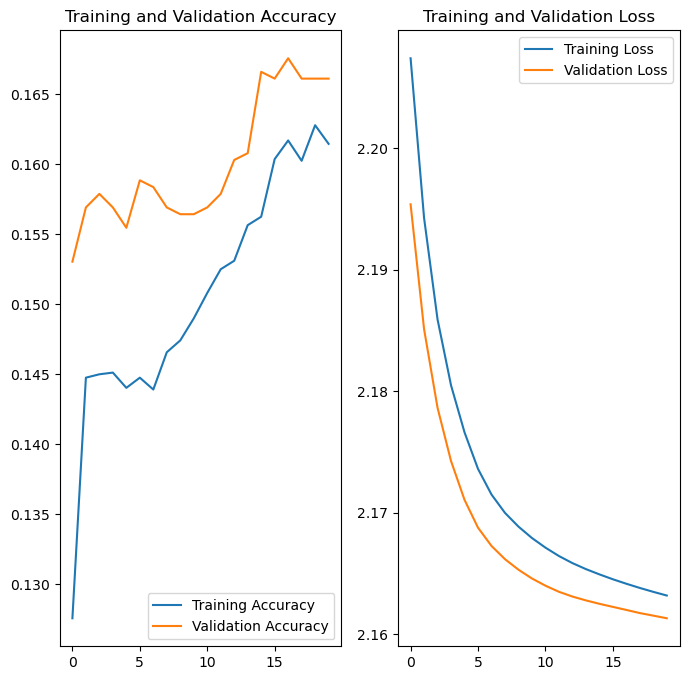

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
### Todo, choose an appropirate optimiser and loss function
#SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [43]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 44s 167ms/step - accuracy: 0.1581 - loss: 2.1894 - val_accuracy: 0.1501 - val_loss: 2.1809
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 44s 169ms/step - accuracy: 0.1475 - loss: 2.1813 - val_accuracy: 0.1714 - val_loss: 2.1735
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.1536 - loss: 2.1713 - val_accuracy: 0.1680 - val_loss: 2.1687
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 114s 441ms/step - accuracy: 0.1576 - loss: 2.1693 - val_accuracy: 0.1714 - val_loss: 2.1653
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - accuracy: 0.1709 - loss: 2.1635 - val_accuracy: 0.1845 - val_loss: 2.1628
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 43s 166ms/step - accuracy: 0.1741 - loss: 2.1661 - val_accuracy: 0.1831 - val_loss: 2.1607
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 43s 167ms/step - accuracy: 0.1734 - loss: 2.1600 - val_accuracy: 0.2136 - val_loss: 2.1590
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.1926 - loss: 2.

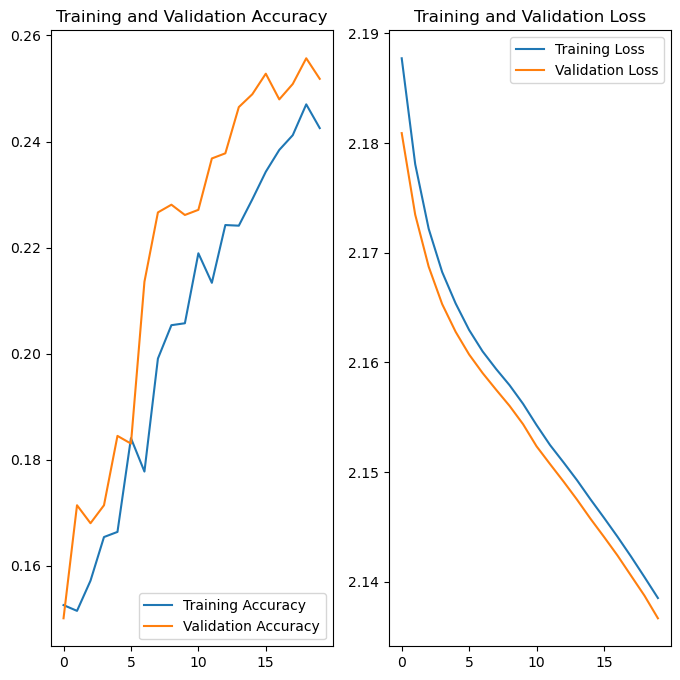

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.2498 - loss: 2.1371
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.2546 - loss: 2.1344


[2.1366825103759766, 0.2518159747123718]

### With Adam and (learning_rate=0.001)

In [58]:
num_classes = 9
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.2286 - loss: 2.0596 - val_accuracy: 0.4576 - val_loss: 1.4405
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 45s 174ms/step - accuracy: 0.4708 - loss: 1.3944 - val_accuracy: 0.5002 - val_loss: 1.3236
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.5568 - loss: 1.1951 - val_accuracy: 0.5985 - val_loss: 1.1351
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.6497 - loss: 0.9417 - val_accuracy: 0.6644 - val_loss: 0.9345
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.7228 - loss: 0.7580 - val_accuracy: 0.7070 - val_loss: 0.7983
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.7903 - loss: 0.5771 - val_accuracy: 0.7138 - val_loss: 0.8413
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.8126 - loss: 0.5078 - val_accuracy: 0.6998 - val_loss: 0.8388
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.8515 - loss: 0

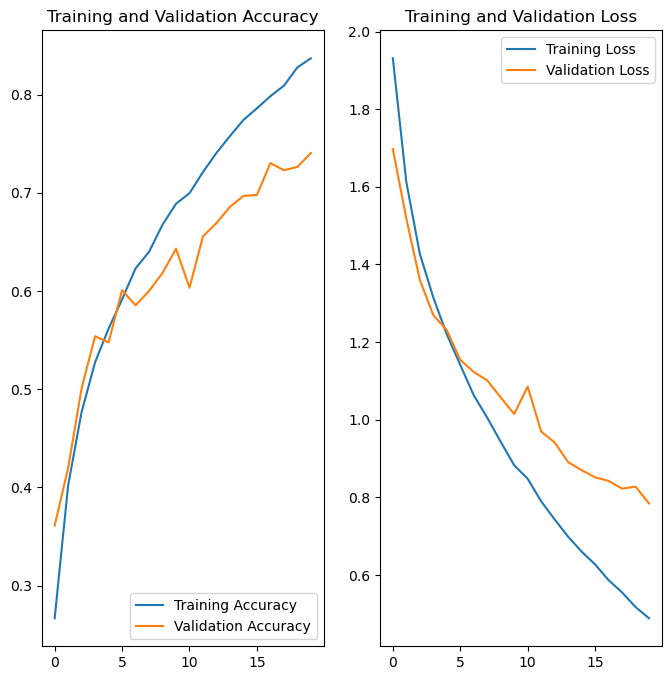

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9604 - loss: 0.0986
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8159 - loss: 0.7349


[0.7635264992713928, 0.8203389644622803]

### Visualizing training results

#### Findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

### Experiment features of Flip, Rotation and Zoom works.

In [134]:
data_augmentation = Sequential(
  [
    #layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    #layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    #layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    ###layers.RandomCrop(img_height,img_width),
    #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  ]
)

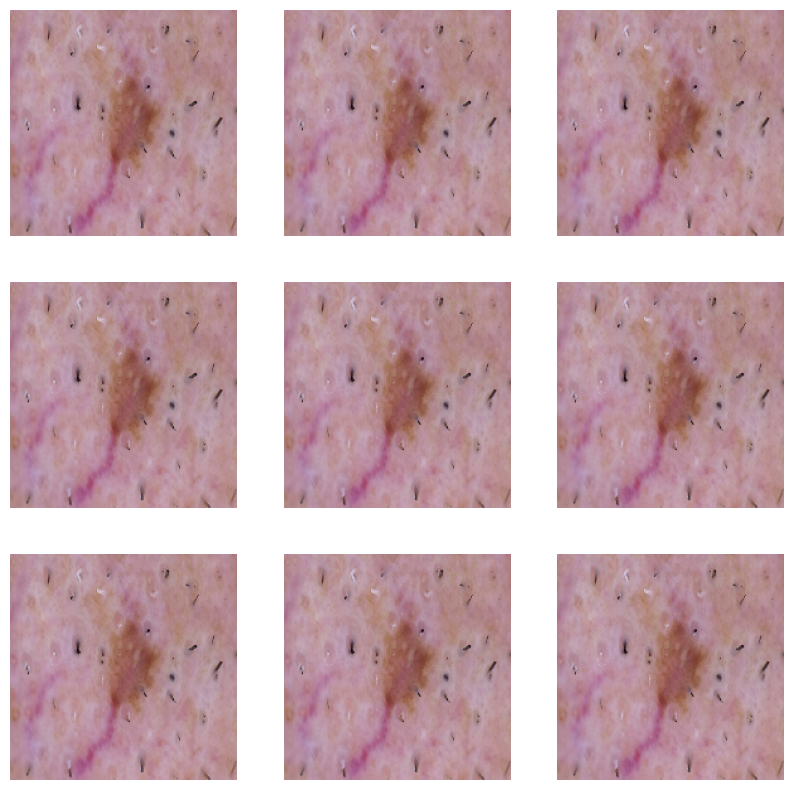

In [141]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(3):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Only Zoom 
### Adam
- of 0.1
- Train: 259/259 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9075 - loss: 0.2411
- Val:   65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8033 - loss: 0.5795

- of 0.2
- Train: 259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9445 - loss: 0.1315
- Val:   65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8502 - loss: 0.4813
### <font colour='green'>Adam(learning_rate=0.001)</font>
- Train: 259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9298 - loss: 0.1808
- Val:   65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8349 - loss: 0.4823
### <font colour='red'>SGD(learning_rate=0.001)</font>
- Train:  259/259 ━━━━━━━━━━━━━━━━━━━━ 55s 212ms/step - accuracy: 0.1361 - loss: 2.1748
- Val:    65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.1404 - loss: 2.1657

### with - Drop layer - SGD(learning_rate=0.001)
- Train: 259/259 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.9334 - loss: 0.1878
- Val: 65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8434 - loss: 0.4736


In [146]:
num_classes = 9
# after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = Sequential(
  [
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
  ]
)
data_augmentation.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#data_augmentation.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), #did not get good result.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = data_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 47s 179ms/step - accuracy: 0.2502 - loss: 1.9964 - val_accuracy: 0.4441 - val_loss: 1.5597
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.4673 - loss: 1.4362 - val_accuracy: 0.4843 - val_loss: 1.3123
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.5356 - loss: 1.2357 - val_accuracy: 0.5501 - val_loss: 1.1870
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 177ms/step - accuracy: 0.5918 - loss: 1.0972 - val_accuracy: 0.6291 - val_loss: 1.0346
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.6432 - loss: 0.9700 - val_accuracy: 0.6242 - val_loss: 1.0329
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 176ms/step - accuracy: 0.6571 - loss: 0.9052 - val_accuracy: 0.6542 - val_loss: 0.9127
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.7166 - loss: 0.7592 - val_accuracy: 0.6906 - val_loss: 0.8293
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 45s 173ms/step - accuracy: 0.7633 - loss: 0

In [150]:
data_augmentation.evaluate(train_ds)
data_augmentation.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9298 - loss: 0.1808
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8349 - loss: 0.4823


[0.5031792521476746, 0.8338983058929443]

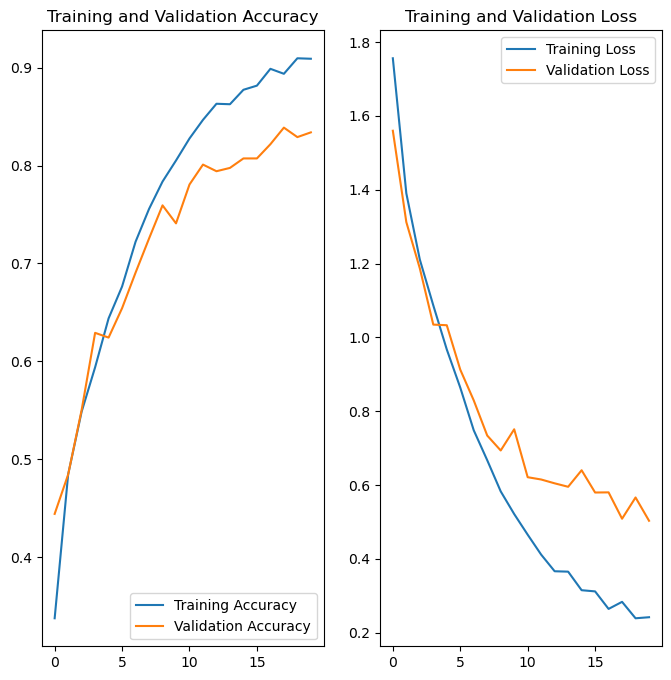

In [152]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [164]:
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join('/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
val_dir = os.path.join('/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [166]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
#https://keras.io/api/preprocessing/image/
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 10328 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


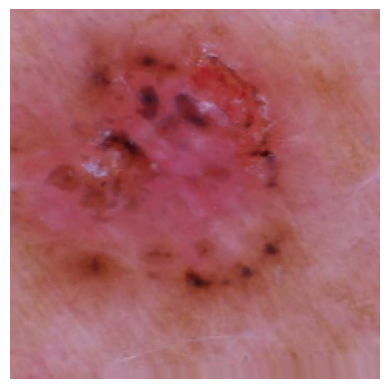

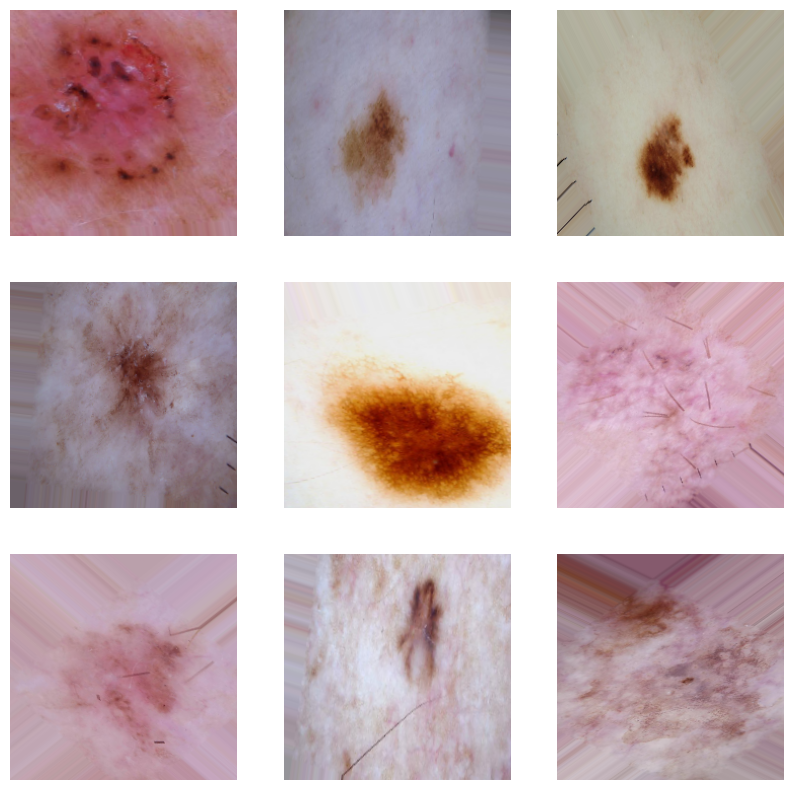

In [177]:
# Fetch a batch of images and labels
images, labels = next(train_data_gen)

# Display the first image in the batch
plt.imshow(images[0])
plt.axis('off')  # Hide axes
plt.show()

# Display a few more images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


### Result:
## Optimizer='adam'
- Train:104/104 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.5443 - loss: 1.1813
- Val: 2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 916ms/step - accuracy: 0.4045 - loss: 2.4843

In [175]:
#Create a CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout,Dense
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 20

history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=10
)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.2382 - loss: 2.5675 - val_accuracy: 0.2881 - val_loss: 1.9577
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.4410 - loss: 1.4896 - val_accuracy: 0.3729 - val_loss: 1.9396
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4636 - loss: 1.4064 - val_accuracy: 0.3729 - val_loss: 1.8473
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4843 - loss: 1.3529 - val_accuracy: 0.3644 - val_loss: 2.0581
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5012 - loss: 1.2934 - val_accuracy: 0.3814 - val_loss: 2.0981
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5140 - loss: 1.2627 - val_accuracy: 0.4407 - val_loss: 2.1541
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5282 - loss: 1.2372 - val_accuracy: 0.4322 - val_loss: 2.3328
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5294 - loss: 1.2097 - val_accu

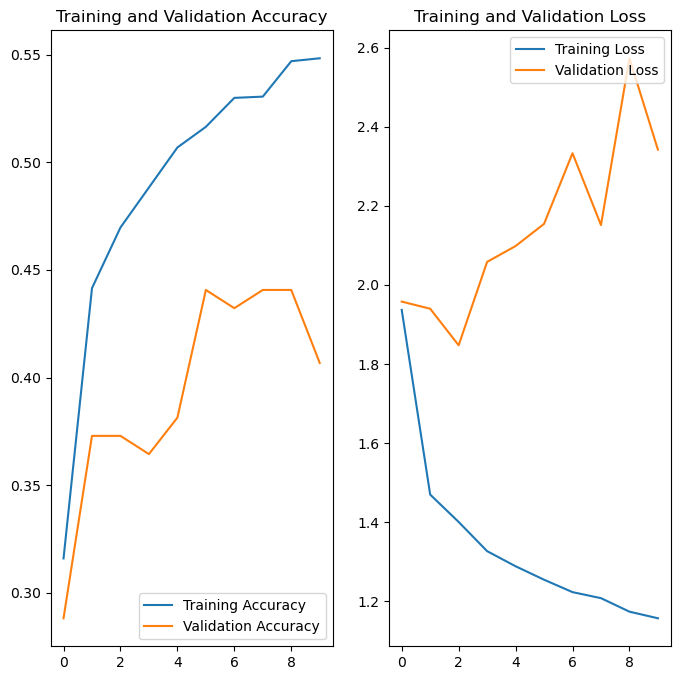

In [178]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [179]:
model.evaluate(train_data_gen)
model.evaluate(val_data_gen)

104/104 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5829 - loss: 1.0880
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.4112 - loss: 2.3030


[2.3417904376983643, 0.4067796468734741]

### Findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

####  The distribution of classes in the training dataset.
####  From above charts we know that this dataset has class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [180]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [181]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
1,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
2,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
3,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
4,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
...,...,...
2234,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,dermatofibroma
2235,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,dermatofibroma
2236,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,dermatofibroma
2237,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,dermatofibroma


Class=3, n=438 (19.562%)
Class=5, n=462 (20.634%)
Class=4, n=357 (15.945%)
Class=1, n=376 (16.793%)
Class=0, n=114 (5.092%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)
Class=6, n=77 (3.439%)
Class=2, n=95 (4.243%)


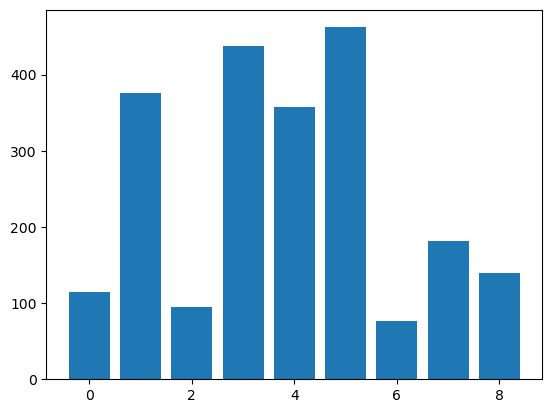

In [182]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### Write your findings here:
#### - Which class has the least number of samples?
- seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis

#### Rectify the class imbalance
####  using a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to adding more samples across all classes so that none of the classes have very few samples.

### Results:
- Train: 259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9175 - loss: 0.1850
- Val:   65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7754 - loss: 0.9748

- Train: 259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9288 - loss: 0.1640
- Val:   65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7756 - loss: 1.0163

In [183]:
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

from sklearn.utils import class_weight
#Class=0, n=114 (5.092%)
#Class=1, n=376 (16.793%)
#Class=2, n=95 (4.243%)
#Class=3, n=438 (19.562%)
#Class=4, n=357 (15.945%)
#Class=5, n=462 (20.634%)
#Class=6, n=77 (3.439%)
#Class=7, n=181 (8.084%)
#Class=8, n=139 (6.208%)

class_weight = {0:5.09,
                1:16.79,
                2:4.24,
                3:19.56,
                4:15.94,
                5:20.63,
                6:3.43,
                7:8.08,
                8:6.20}

#class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])


### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  class_weight=class_weight)



Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 49s 185ms/step - accuracy: 0.2503 - loss: 21.6817 - val_accuracy: 0.4431 - val_loss: 1.6227
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.4490 - loss: 15.7145 - val_accuracy: 0.4794 - val_loss: 1.4875
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.5181 - loss: 13.2092 - val_accuracy: 0.5385 - val_loss: 1.2561
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.5830 - loss: 11.1754 - val_accuracy: 0.5646 - val_loss: 1.1979
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.6558 - loss: 8.8152 - val_accuracy: 0.6489 - val_loss: 0.9831
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.7301 - loss: 6.9459 - val_accuracy: 0.6426 - val_loss: 1.0546
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 177ms/step - accuracy: 0.7734 - loss: 5.4499 - val_accuracy: 0.6446 - val_loss: 1.0879
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.8114 - los

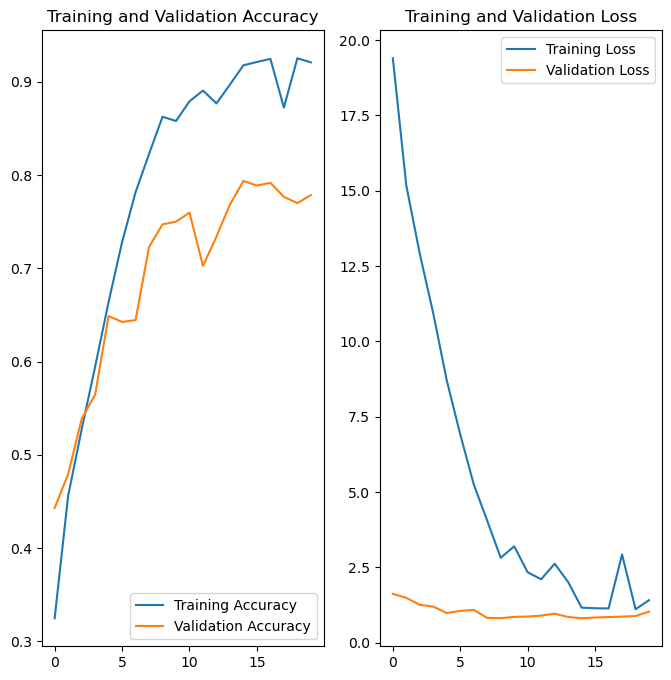

In [184]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [185]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9288 - loss: 0.1640
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7756 - loss: 1.0163


[1.0305413007736206, 0.7786924839019775]

## 8.Handling class imbalances 
- using Augmentor

In [ ]:
#!jupyter kernelspec  list --json
!jupyter kernelspec  list

In [ ]:
import sys
print(sys.version)

In [ ]:
!which -a python

In [236]:
!pip install Augmentor

# copied images from Colab as Augmentor did not work on my local env.

In [235]:
#https://github.com/mdbloice/Augmentor

datapath = '/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
import Augmentor

# for cancer_class in class_names:
#   p = Augmentor.Pipeline(datapath+cancer_class)
#   #Every function requires you to specify a probability, which is used to decide if an operation is applied to an image as it is passed through the augmentation pipeline.
#   p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#   p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
#   p.sample(150)
#   p.process()


ModuleNotFoundError: No module named 'Augmentor'

In [187]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

8089


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [188]:
path_to_training_dataset="/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train"


In [ ]:
# import Augmentor
# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset + i)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [189]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

8089


### Lets see the distribution of augmented data after adding new images to the original training data.

In [190]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010267.jpg_a5981a30-7ff6-4afa-b193-2c6b0442372b.jpg',
 '/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000520.jpg_bb8fb78a-f0de-44eb-84ed-f850921700b7.jpg',
 '/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010797.jpg_e1439590-ff2d-4a8e-976d-80f7cf70bd68.jpg',
 '/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010576.jpg_c576d492-dc3d-425b-9286-620faded1bd7.jpg',
 '/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010785.jpg_ea442f69

In [191]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [192]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [193]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [194]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1574
melanoma                      1526
basal cell carcinoma          1402
nevus                         1364
squamous cell carcinoma       1012
vascular lesion                928
actinic keratosis              878
dermatofibroma                 840
seborrheic keratosis           804
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [195]:
new_df.head()

,Path,Label
0,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
1,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
2,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
3,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma
4,/Users/narayanaisanaka/UpGrad/2024/CNN/MEL/Ski...,melanoma


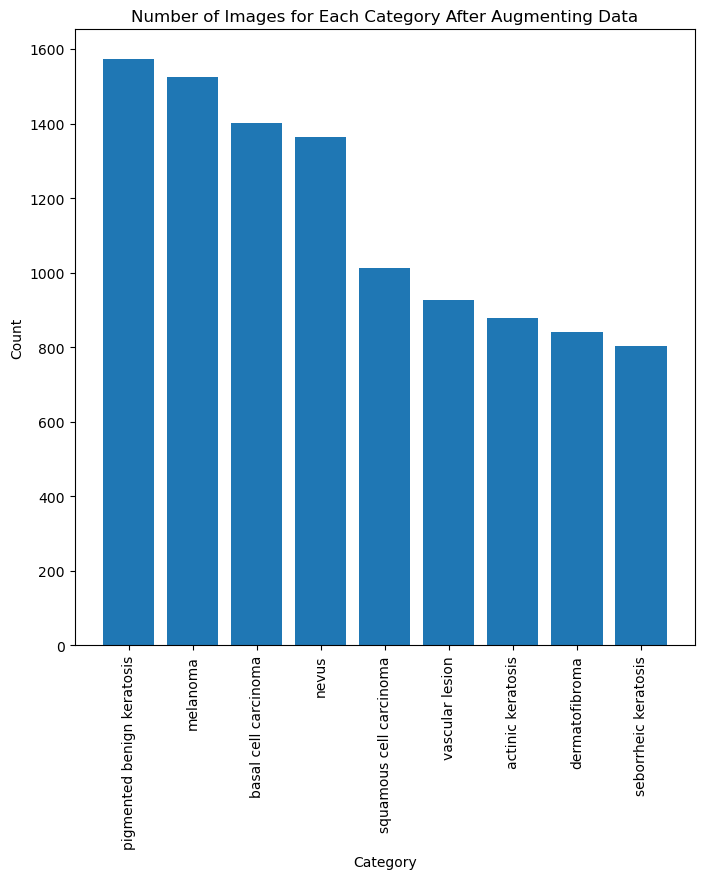

In [196]:

label_counts = new_df['Label'].value_counts()
plt.figure(figsize=(8, 8))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Images for Each Category After Augmenting Data')
plt.xticks(rotation=90)
plt.show()

#### **Todo**: Train the model on the data created using Augmentor

In [197]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [200]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10328 files belonging to 9 classes.
Using 8263 files for training.


#### **Todo:** Create a validation dataset

In [201]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10328 files belonging to 9 classes.
Using 2065 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
### GOOD RESULTS

In [202]:
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [203]:
## your code goes here
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [204]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 52s 197ms/step - accuracy: 0.1610 - loss: 2.1676 - val_accuracy: 0.2015 - val_loss: 2.1506
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 51s 197ms/step - accuracy: 0.2002 - loss: 2.1458 - val_accuracy: 0.1927 - val_loss: 2.1316
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 51s 195ms/step - accuracy: 0.2173 - loss: 2.1237 - val_accuracy: 0.2184 - val_loss: 2.1126
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.2400 - loss: 2.0908 - val_accuracy: 0.1593 - val_loss: 2.1322
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 50s 193ms/step - accuracy: 0.2552 - loss: 2.0359 - val_accuracy: 0.2373 - val_loss: 2.0019
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 50s 191ms/step - accuracy: 0.2928 - loss: 1.9447 - val_accuracy: 0.2726 - val_loss: 1.8716
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.3067 - loss: 1.8428 - val_accuracy: 0.3133 - val_loss: 1.7695
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 50s 193ms/step - accuracy: 0.3254 - loss: 1

#### **Todo:**  Visualize the model results

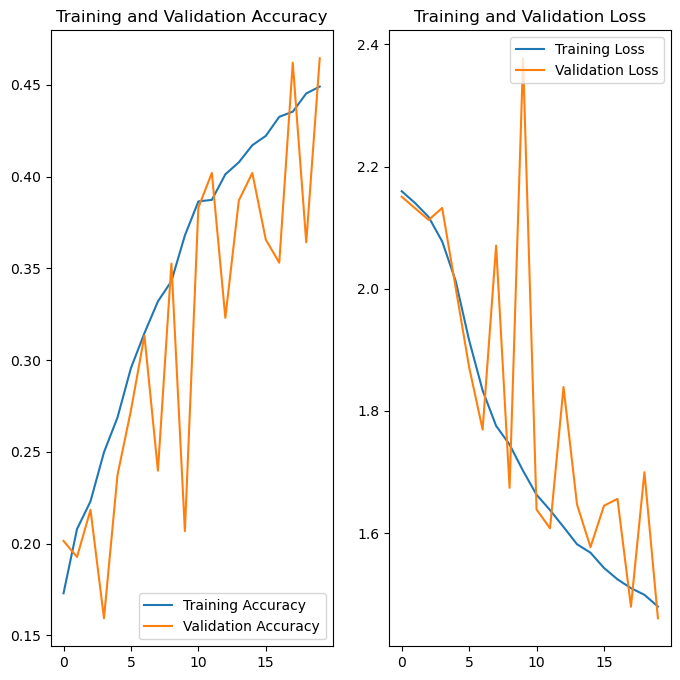

In [205]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Yes the class rebalance helped to improve the performance of the model. 
### Specally zoom of 0.2 helped to increase the accruacy

In [231]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [232]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [233]:
num_classes = 9
# after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = Sequential(
  [
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
  ]
)
data_augmentation.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#data_augmentation.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), #did not get good result.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = data_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.2353 - loss: 2.2302 - val_accuracy: 0.3400 - val_loss: 1.9002
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.3298 - loss: 1.8495 - val_accuracy: 0.4922 - val_loss: 1.5391
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.4720 - loss: 1.5185 - val_accuracy: 0.5011 - val_loss: 1.4137
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.5093 - loss: 1.3872 - val_accuracy: 0.4720 - val_loss: 1.5826
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - accuracy: 0.5217 - loss: 1.3388 - val_accuracy: 0.5302 - val_loss: 1.4072
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.5625 - loss: 1.2310 - val_accuracy: 0.5011 - val_loss: 1.4283
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.5607 - loss: 1.2034 - val_accuracy: 0.5145 - val_loss: 1.4192
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.5672 - loss: 1.1991 - val_accu

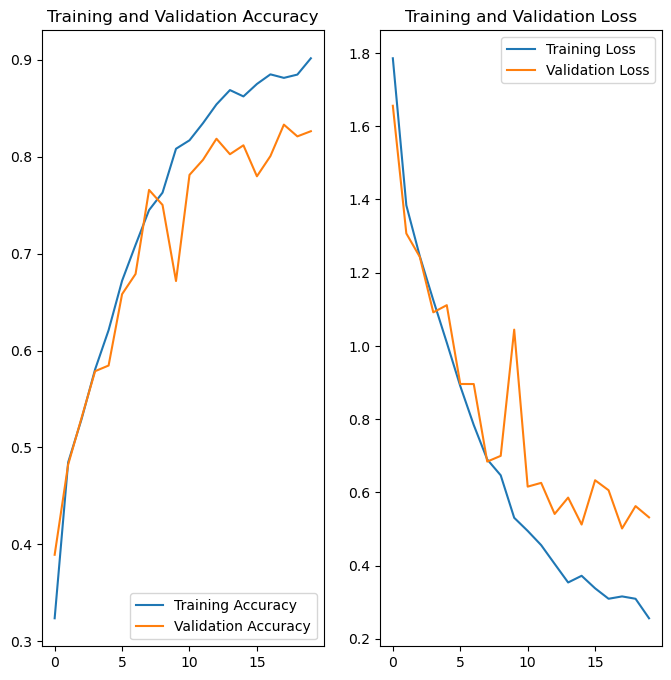

In [224]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [225]:
model.evaluate(train_ds)
model.evaluate(val_ds)

259/259 ━━━━━━━━━━━━━━━━━━━━ 101s 390ms/step - accuracy: 0.1511 - loss: 13.1451
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.1502 - loss: 13.1565


[13.151153564453125, 0.1501210629940033]